### **Import packages**

In [33]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### **Import data**

In [34]:
data = pd.read_csv('../input/insurance.csv')

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.shape

(1338, 7)

### **Basic Stats**

In [37]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### **Check and remediate if there are any null values**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**COMMENT:** Above output shows that there are No Null values.

In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**COMMENT:** Above output shows that there are No Null values.

### **Category Columns**

In [40]:
cat_cols = data.columns[data.dtypes=='object']
data_cat = data[cat_cols]
cat_cols
data_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


### **Numerical Columns**

In [41]:
num_cols = data.columns[data.dtypes!='object']
data_num = data[num_cols]
num_cols
data_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### **Correlation of Numerical Columns**

In [42]:
#Inspecting the corrolation between the features
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


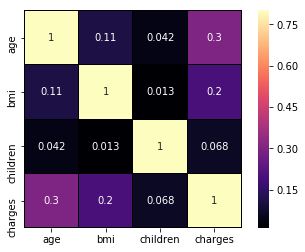

In [43]:
#sns.heatmap(data_num.corr())
sns.heatmap(data_num.corr(), vmax=.8, linewidths=0.01,square=True,annot=True,cmap='magma',linecolor="black")

**COMMENT:** There is some correlation betweeen BMI & Age and BMI & charges

### **Pairplot of Numerical Columns**

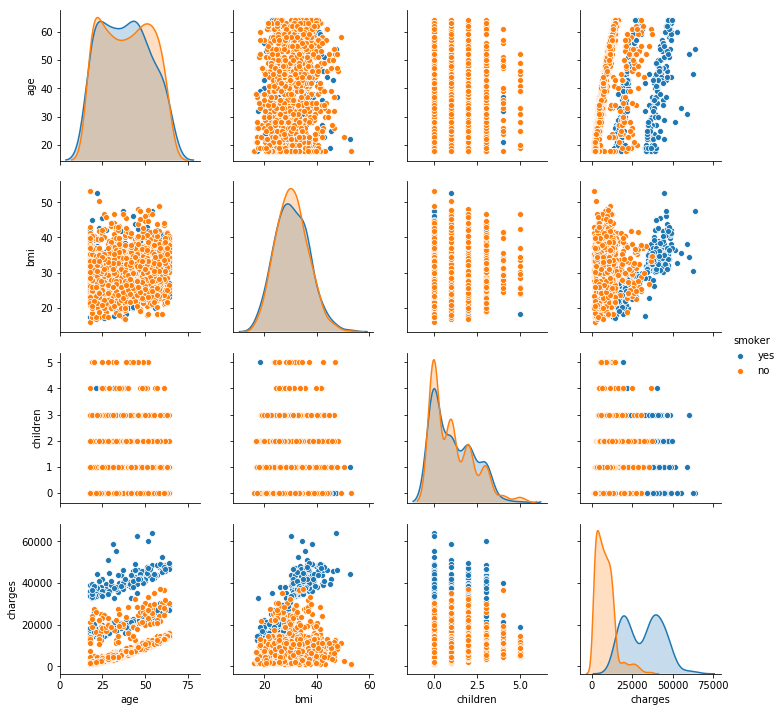

In [44]:
sns.pairplot(data, hue='smoker')
#sns.pairplot(data_num, hue='smoker', palette="Set2", diag_kind="kde", size=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c13c1eda0>,
      dtype=object)

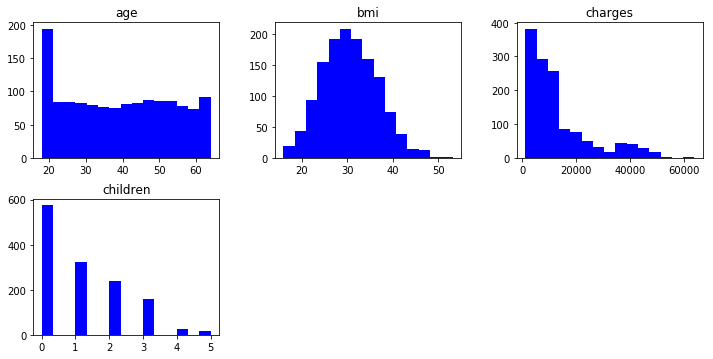

In [45]:
data.hist(layout = (3, 3), figsize=(12, 9), color='blue', grid=False, bins=15)

### **Comparison of Category Columns**

In [46]:
#pd.crosstab(data.sex, data.smoker)
pd.crosstab(data.sex, data.smoker, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')

smoker,no,yes
sex,,
female,0.83,0.17
male,0.76,0.24
All,0.8,0.2


**COMMENT:** Insurance charges are more for males as compared to females

In [47]:
#pd.crosstab(data.sex, data.region)
pd.crosstab(data.sex, data.region, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')

region,northeast,northwest,southeast,southwest
sex,,,,
female,0.24,0.25,0.26,0.24
male,0.24,0.24,0.28,0.24
All,0.24,0.24,0.27,0.24


**COMMENT:** Males are more in SouthEast as compared to other regions

In [48]:
#pd.crosstab(data.smoker, data.region)
pd.crosstab(data.smoker, data.region, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')

region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.24,0.25,0.26,0.25
yes,0.24,0.21,0.33,0.21
All,0.24,0.24,0.27,0.24


**COMMENT:** Smokers are more in SouthEast as compared to other regions

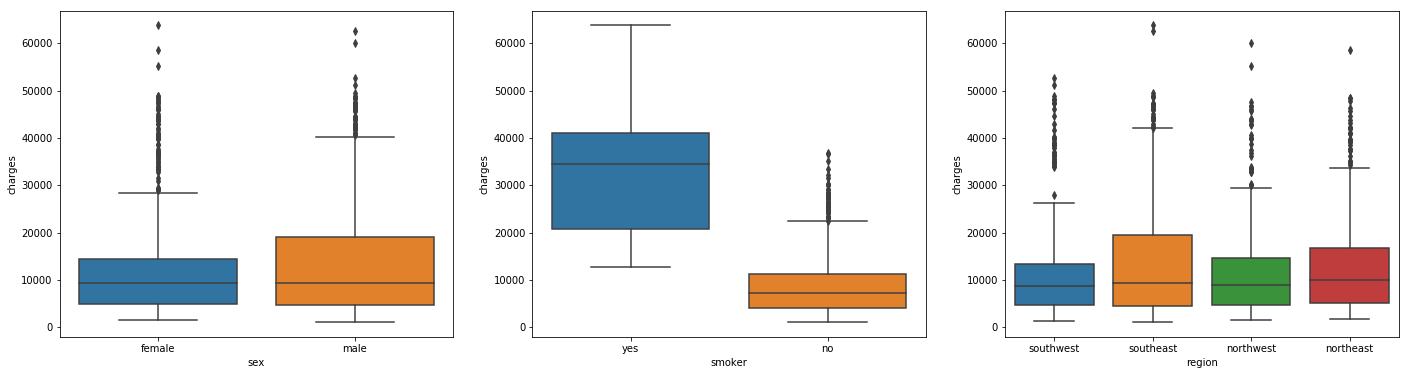

In [49]:
plt.figure(figsize=(24,6))
plt.subplot(131)  ; sns.boxplot(x='sex',y='charges',data=data)
plt.subplot(132)  ; sns.boxplot(x='smoker',y='charges',data=data)
plt.subplot(133)  ; sns.boxplot(x='region',y='charges',data=data)

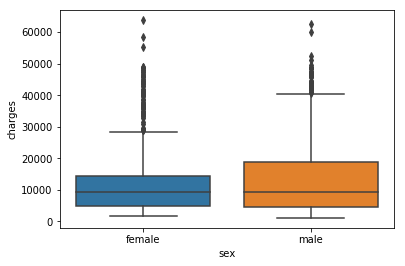

In [58]:
#plt.figure(figsize=(9,6))
sns.boxplot(x='sex',y='charges',data=data)

**COMMENT:** 
1. Males pay more Insurance Charges (may due to more Smoker population in males)
2. Smokers pay more Insurance Charges (may due to high risk of diseases in smokers)
3. People in SouthEast region pay more Insurance charges (may due to more male poplulation, which also means more smoker population)

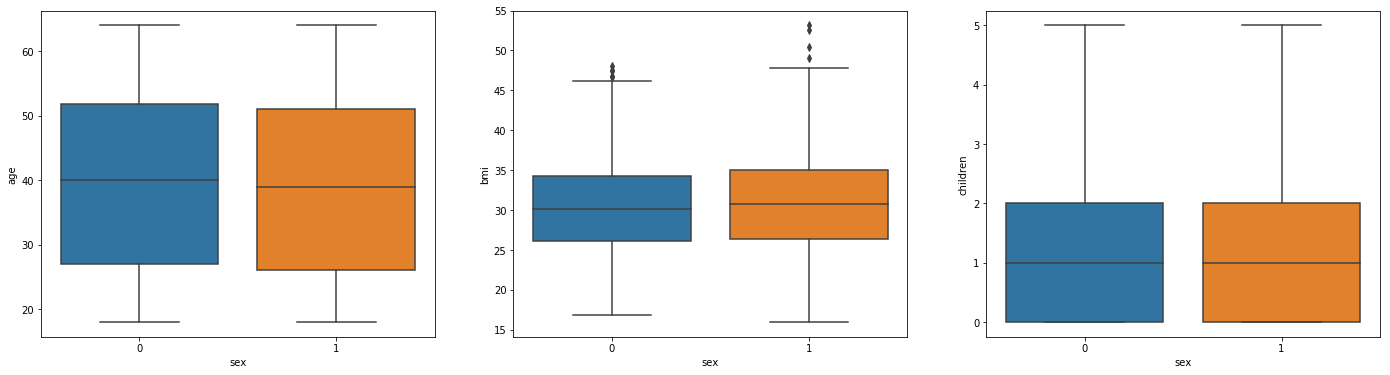

In [32]:
plt.figure(figsize=(24,6))
plt.subplot(131)  ; sns.boxplot(x='sex',y='age',data=data)
plt.subplot(132)  ; sns.boxplot(x='sex',y='bmi',data=data)
plt.subplot(133)  ; sns.boxplot(x='sex',y='children',data=data)

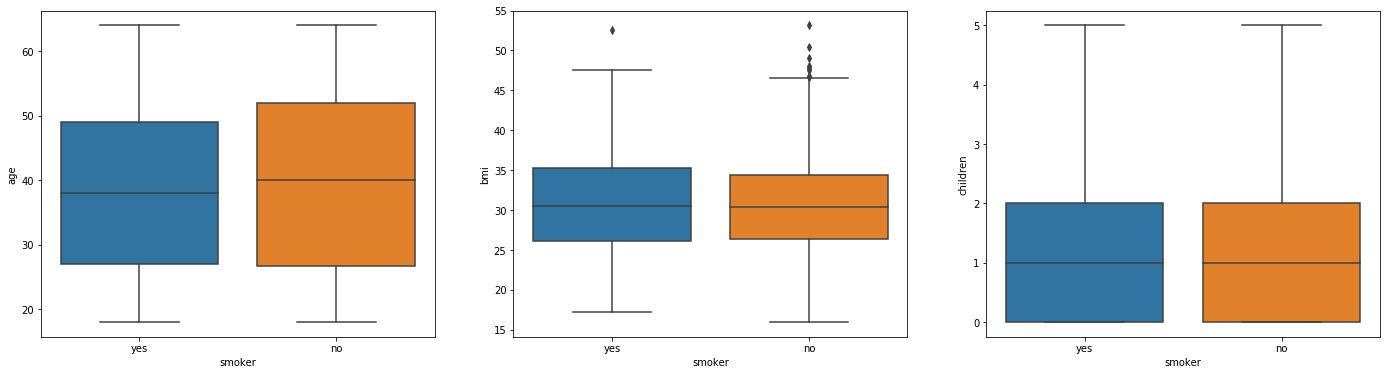

In [19]:
plt.figure(figsize=(24,6))
plt.subplot(131)  ; sns.boxplot(x='smoker',y='age',data=data)
plt.subplot(132)  ; sns.boxplot(x='smoker',y='bmi',data=data)
plt.subplot(133)  ; sns.boxplot(x='smoker',y='children',data=data)

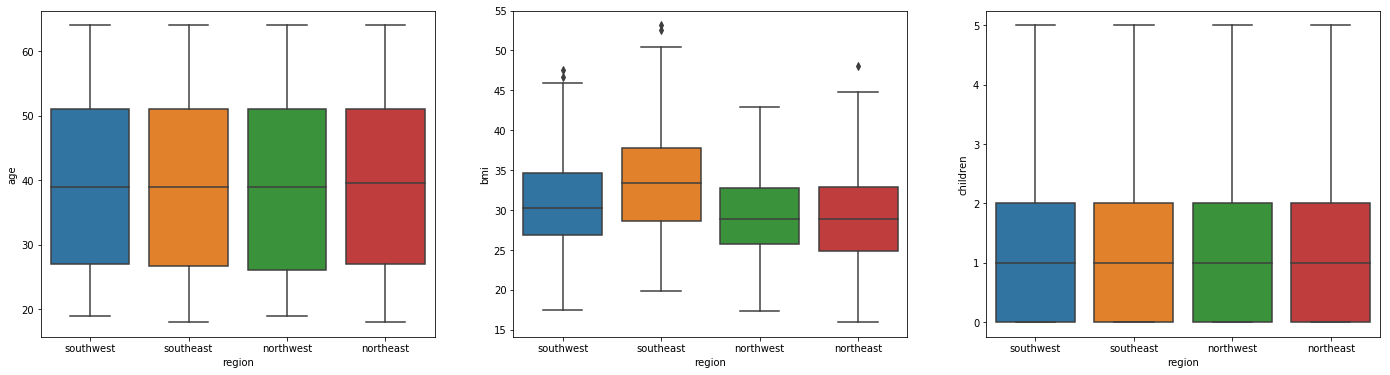

In [20]:
plt.figure(figsize=(24,6))
plt.subplot(131)  ; sns.boxplot(x='region',y='age',data=data)
plt.subplot(132)  ; sns.boxplot(x='region',y='bmi',data=data)
plt.subplot(133)  ; sns.boxplot(x='region',y='children',data=data)

### **Encoding Category Values into Numerical values**

In [21]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### **Splitting, Training & Testing using Linear Regression**

In [23]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


### **Splitting, Training & Testing using Polynomial Features**

In [24]:
X = data.drop(['charges'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8846283666147681
